# Keras Model

## Model 준비

### 시간 측정

In [59]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 1.55 s (started: 2022-10-21 20:00:14 +09:00)


### directiory 설정


*   상황에 맞게 수정




In [60]:
%cd /home/jwjang/project_tf28

/home/jwjang/project_tf28
time: 1.73 ms (started: 2022-10-21 20:00:17 +09:00)


### library 설치

In [61]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.8.0
time: 719 µs (started: 2022-10-21 20:00:19 +09:00)


## Model 설정



*   dataset은 beverage 폴더 안에 train, validation으로 나눠서 넣어야 합니다.





In [62]:
#batch_size, img_height, img_width 설정
batch_size = 32
img_height = 224
img_width = 224

time: 524 µs (started: 2022-10-21 20:00:20 +09:00)


In [63]:
#경로 설정
execution_path = os.getcwd()
beverage_path = os.path.join(execution_path, 'output')
train_dir = os.path.join(beverage_path, 'train')
validation_dir = os.path.join(beverage_path, 'val')

time: 759 µs (started: 2022-10-21 20:00:21 +09:00)


In [64]:
train_dir

'/home/jwjang/project_tf28/output/train'

time: 2.58 ms (started: 2022-10-21 20:00:22 +09:00)


In [65]:
#데이터 셋 불러오기
train_ds = tf.keras.preprocessing.image_dataset_from_directory(train_dir, image_size=(img_height,img_width), batch_size=batch_size)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(validation_dir, image_size=(img_height,img_width), batch_size=batch_size)

Found 694 files belonging to 8 classes.
Found 177 files belonging to 8 classes.
time: 78 ms (started: 2022-10-21 20:00:23 +09:00)


In [66]:
#class 확인
class_names = train_ds.class_names
print(class_names)

['chilsung cider can', 'coca cola can', 'demisoda apple can', 'dr pepper can', 'gatorade can', 'pepsi can', 'pocari sweat can', 'powerade can']
time: 547 µs (started: 2022-10-21 20:00:24 +09:00)


## Model 학습



```
tf.keras.applications.InceptionResNetV2(
    include_top=True, weights=None, input_shape=(224,224,3),classes=10, classifier_activation='softmax')
```


```
tf.keras.applications.MobileNetV2(
  input_shape=(224,224,3), alpha=1.0, include_top=True, weights=None,
    input_tensor=None, pooling=None, classes=10, classifier_activation='softmax')
```





### 처음부터 학습하기

In [67]:
from keras.callbacks import CSVLogger
csv_logger = CSVLogger('./log.csv',append=True, separator=';')
callbacks = keras.callbacks.ModelCheckpoint("MobileNet_{epoch}.h5", monitor='val_loss', verbose=1, save_best_only=True)

time: 842 µs (started: 2022-10-21 20:00:27 +09:00)


In [68]:
model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3), classes=10, weights=None, classifier_activation='softmax')
model.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

time: 481 ms (started: 2022-10-21 20:00:38 +09:00)


In [69]:
hist = model.fit(train_ds, validation_data = val_ds, batch_size=batch_size, epochs=1, callbacks=[csv_logger, callbacks]) #상황에 맞게 수정

/home/jwjang/tf28/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


22/22 [==============================] - ETA: 0s - loss: 1.6187 - accuracy: 0.4236
Epoch 1: val_loss improved from inf to 2.27618, saving model to MobileNet_1.h5
22/22 [==============================] - 7s 214ms/step - loss: 1.6187 - accuracy: 0.4236 - val_loss: 2.2762 - val_accuracy: 0.1638
time: 7.06 s (started: 2022-10-21 20:00:39 +09:00)


### 이어서 학습하기


In [51]:
from keras.callbacks import CSVLogger
csv_logger = CSVLogger('./log.csv',append=True, separator=';')
callbacks = keras.callbacks.ModelCheckpoint("MobileNet_{epoch}.h5", monitor='val_loss', verbose=1, save_best_only=True)

time: 713 µs (started: 2022-10-21 19:51:07 +09:00)


In [70]:
model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3), weights=None,classes=10, classifier_activation='softmax')
model.load_weights(execution_path+'/'+'MobileNet_1.h5') #상황에 맞게 수정
model.compile(optimizer='adam', loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

time: 589 ms (started: 2022-10-21 20:01:06 +09:00)


In [71]:
hist = model.fit(train_ds, validation_data = val_ds, batch_size=batch_size, epochs=20, callbacks=[csv_logger,callbacks], initial_epoch=10) #상황에 맞게 수정

Epoch 11/20
22/22 [==============================] - ETA: 0s - loss: 1.1925 - accuracy: 0.5591
Epoch 11: val_loss improved from 2.27618 to 2.25589, saving model to MobileNet_11.h5
22/22 [==============================] - 7s 215ms/step - loss: 1.1925 - accuracy: 0.5591 - val_loss: 2.2559 - val_accuracy: 0.1638
Epoch 12/20
22/22 [==============================] - ETA: 0s - loss: 0.6830 - accuracy: 0.7493
Epoch 12: val_loss improved from 2.25589 to 2.22138, saving model to MobileNet_12.h5
22/22 [==============================] - 4s 193ms/step - loss: 0.6830 - accuracy: 0.7493 - val_loss: 2.2214 - val_accuracy: 0.1638
Epoch 13/20
22/22 [==============================] - ETA: 0s - loss: 0.4914 - accuracy: 0.8184
Epoch 13: val_loss improved from 2.22138 to 2.18329, saving model to MobileNet_13.h5
22/22 [==============================] - 4s 193ms/step - loss: 0.4914 - accuracy: 0.8184 - val_loss: 2.1833 - val_accuracy: 0.2034
Epoch 14/20
22/22 [==============================] - ETA: 0s - loss

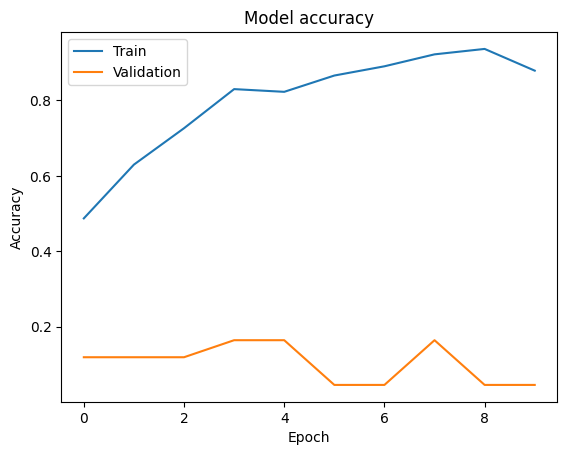

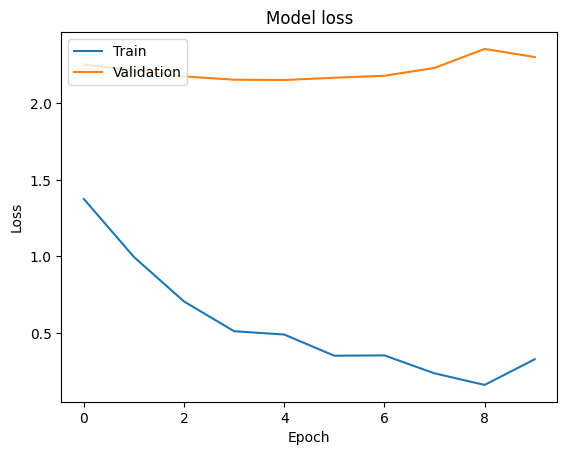

time: 177 ms (started: 2022-10-21 19:51:53 +09:00)


In [54]:
# 6 훈련 과정 시각화 (정확도)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 7 훈련 과정 시각화 (손실)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Convert


### h5 to tflite convert


In [72]:
new_model= tf.keras.models.load_model(filepath="/home/jwjang/project_tf28/MobileNet_1.h5")
tflite_converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model = tflite_converter.convert()
open("MobileNet_model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmplolqs9qz/assets


INFO:tensorflow:Assets written to: /tmp/tmplolqs9qz/assets
2022-10-21 20:06:17.623412: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2022-10-21 20:06:17.623451: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
2022-10-21 20:06:17.623650: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /tmp/tmplolqs9qz
2022-10-21 20:06:17.649387: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2022-10-21 20:06:17.649429: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedModel debug info (if present) from: /tmp/tmplolqs9qz
2022-10-21 20:06:17.738334: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-10-21 20:06:18.366800: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: /tmp/tmplolqs9qz
2022-10-21 20:06:18.572547: I tensorflow/cc/saved_model/loader.cc:301] SavedModel

8916008

time: 20.6 s (started: 2022-10-21 20:05:58 +09:00)


### h5 to pb convert


In [73]:
model = tf.keras.models.load_model("/home/jwjang/project_tf28/MobileNet_1.h5")
export_dir = os.getcwd()
model.save(export_dir, save_format="tf")

INFO:tensorflow:Assets written to: /home/jwjang/project_tf28/assets


INFO:tensorflow:Assets written to: /home/jwjang/project_tf28/assets


time: 9.95 s (started: 2022-10-21 20:06:24 +09:00)


### pb to tflite convert


In [74]:
saved_model_dir = os.getcwd()
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
converter.target_spec.supported_ops=[tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
tflite_model= converter.convert()
open(saved_model_dir+'/model.tflite','wb').write(tflite_model)

2022-10-21 20:06:42.709822: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:357] Ignored output_format.
2022-10-21 20:06:42.709856: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored drop_control_dependency.
2022-10-21 20:06:42.710041: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /home/jwjang/project_tf28
2022-10-21 20:06:42.734832: I tensorflow/cc/saved_model/reader.cc:78] Reading meta graph with tags { serve }
2022-10-21 20:06:42.734869: I tensorflow/cc/saved_model/reader.cc:119] Reading SavedModel debug info (if present) from: /home/jwjang/project_tf28
2022-10-21 20:06:42.806532: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-10-21 20:06:43.413030: I tensorflow/cc/saved_model/loader.cc:212] Running initialization op on SavedModel bundle at path: /home/jwjang/project_tf28
2022-10-21 20:06:43.605816: I tensorflow/cc/saved_model/loader.cc:301] SavedModel load for tags { serve }; Status

8916008

time: 6.38 s (started: 2022-10-21 20:06:38 +09:00)


: 

## 기타 참고할 내용

In [58]:
hist = model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data = (X_val, Y_val))

print(hist.history['loss'])
print(hist.history['acc'])
print(hist.history['val_loss'])
print(hist.history['val_acc'])

NameError: name 'X_train' is not defined

time: 16.7 ms (started: 2022-10-21 19:52:30 +09:00)
